## 🧡 모듈 정리

In [1]:
from sklearn.datasets import load_diabetes # 당뇨병 환자 데이터
from sklearn.model_selection import train_test_split # 학습 데이터와 테스트 데이터 분리 
import matplotlib.pyplot as plt #  시각화 모듈
%matplotlib inline 
import pandas as pd # 데이터 프레임 모듈
import numpy as np
import warnings
warnings.filterwarnings( 'ignore' ) # 경고 문구 무시

## 📚 데이터 가져오기

In [2]:
data = load_diabetes()
df_X = data.data
df_y = data.target

## 📰 모델에 입력할 데이터 X 준비하기

In [3]:
pd.DataFrame(df_X)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


## 📰 모델에 입력할 데이터 y 준비하기

In [4]:
pd.DataFrame(df_y)

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


## 🍳 train데이터와 test데이터 준비하기

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_X, 
                                                    df_y, 
                                                    test_size=0.2, 
                                                    random_state=7)        

## 🧍‍♂️ 모델 준비하기

In [6]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## 🙀손실함수 loss 정의하기

In [7]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## 📏기울기를 구하는 gradient 함수 구현하기

In [8]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [15]:
# 기울기 계산
dW, db = gradient(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-7.3210817  -2.37673713  6.43691214  3.06092281 -0.19536714 -1.20753058
 -5.2380973   3.28946397  4.50654858  2.35235436]
db: 3.6922994954598547


## ⚙ 하이퍼 파라미터인 학습률 설정하기

In [10]:
LEARNING_RATE = 0.1

## 📝모델 학습하기

In [11]:
losses = []

for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if (i==1)|(i % 300 == 0):
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1 : Loss 20947.3028
Iteration 300 : Loss 2880.4711
Iteration 600 : Loss 2877.4023
Iteration 900 : Loss 2875.1261
Iteration 1200 : Loss 2873.0609
Iteration 1500 : Loss 2871.1718
Iteration 1800 : Loss 2869.4372
Iteration 2100 : Loss 2867.8411
Iteration 2400 : Loss 2866.3711
Iteration 2700 : Loss 2865.0164
Iteration 3000 : Loss 2863.7675
Iteration 3300 : Loss 2862.6162
Iteration 3600 : Loss 2861.5546
Iteration 3900 : Loss 2860.5758
Iteration 4200 : Loss 2859.6732
Iteration 4500 : Loss 2858.8410
Iteration 4800 : Loss 2858.0736


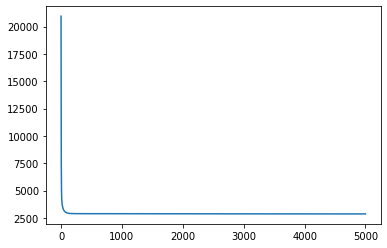

In [12]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

## 💨test 데이터에 대한 성능 확인하기

In [13]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2946.6503974019997

## 📊 정답 데이터와 예측한 데이터 시각화하기

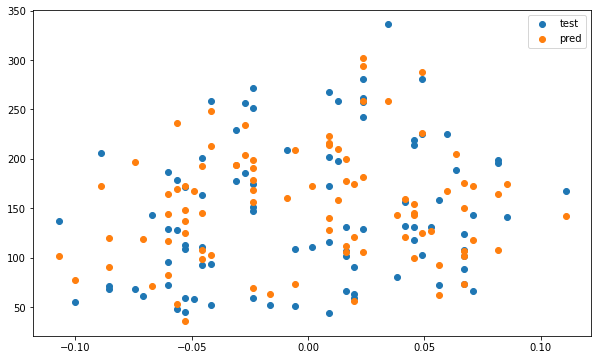

In [14]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.title('')
plt.legend(('test','pred'))
plt.show()